네번째 데이터분석 연습문제 4-1은 7월30일(수) 시작전까지 제출해주세요.
4-1. 인구현황 데이터 분석 (필수)


In [3]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [36]:
#1. 지역별 총인구수 Top5
import pandas as pd

data = pd.read_csv("../data/인구현황.csv")
print(type(data))
data['총인구수'].dtypes

print(data.dtypes)


<class 'pandas.core.frame.DataFrame'>
행정기관코드      int64
행정기관       object
총인구수        int64
세대수         int64
세대당 인구    float64
남자 인구수      int64
여자 인구수      int64
남여 비율     float64
dtype: object


In [18]:
data.head()

,행정기관코드,행정기관,총인구수,세대수,세대당 인구,남자 인구수,여자 인구수,남여 비율
0,1000000000,전국,51217221,24118928,2.12,25498324,25718897,0.99
1,1100000000,서울특별시,9331828,4482063,2.08,4505355,4826473,0.93
2,2600000000,부산광역시,3266598,1570403,2.08,1589912,1676686,0.95
3,2700000000,대구광역시,2363629,1104130,2.14,1159601,1204028,0.96
4,2800000000,인천광역시,3021010,1373827,2.20,1509243,1511767,1.00


In [57]:
data = data[data['행정기관'] != '전국']
df = data[['행정기관', '총인구수']].copy()

top5 = df.sort_values(by="총인구수", ascending=False).head(5)
top5


,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


In [29]:
%matplotlib inline

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

font_path = "C:/Windows/Fonts/malgun.ttf"  # 슬래시(`/`) 또는 이스케이프(`\\`) 사용

# 2. FontProperties 객체 생성
font_prop = fm.FontProperties(fname=font_path)

# 3. 폰트 이름 확인 (확인용)
print("폰트 이름:", font_prop.get_name())

# 4. matplotlib에 폰트 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rc('font', family=font_path)

matplotlib  3.9.2
seaborn  0.13.2
폰트 이름: Malgun Gothic


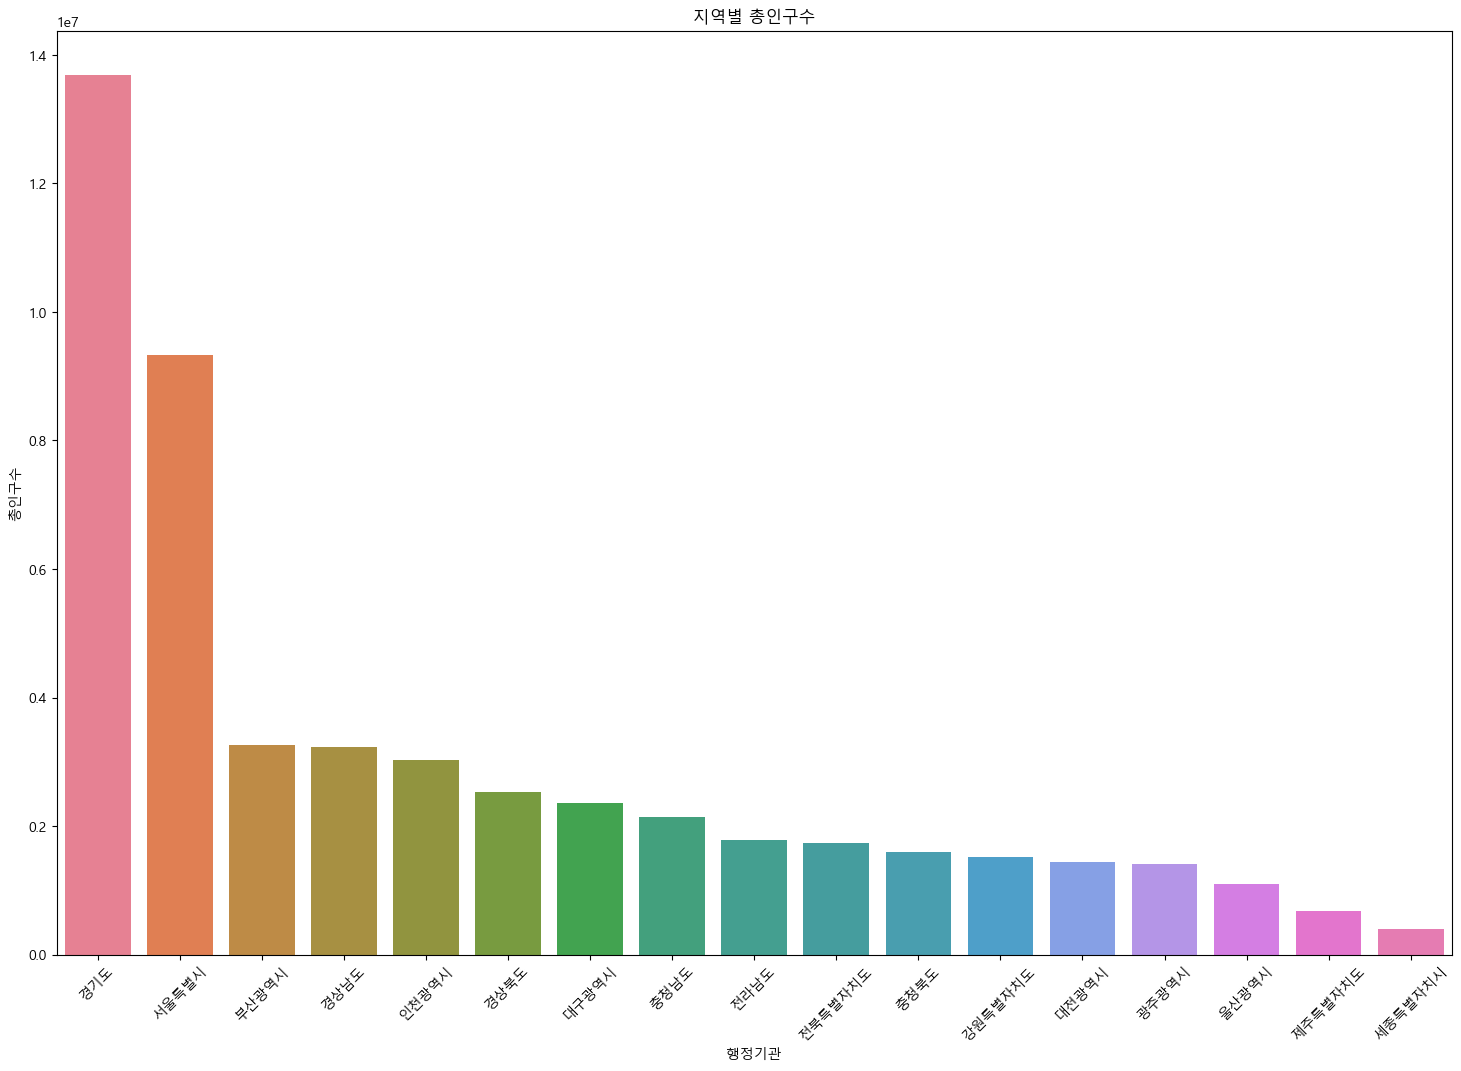

In [69]:
# 1-1. 지역별 총인구수 plot
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 12)

sns.barplot(
    data=df.sort_values(by='총인구수', ascending=False),
    x='행정기관',
    y='총인구수',
    hue='행정기관'  
)

axes.tick_params(axis='x', rotation=45)
plt.title("지역별 총인구수")
plt.show()


In [48]:
home = data[['행정기관','세대당 인구']].copy()
top5_home = home.sort_values(by='세대당 인구', ascending=False).head(5)
top5_home

,행정기관,세대당 인구
8,세종특별자치시,2.39
9,경기도,2.26
7,울산광역시,2.22
4,인천광역시,2.20
3,대구광역시,2.14


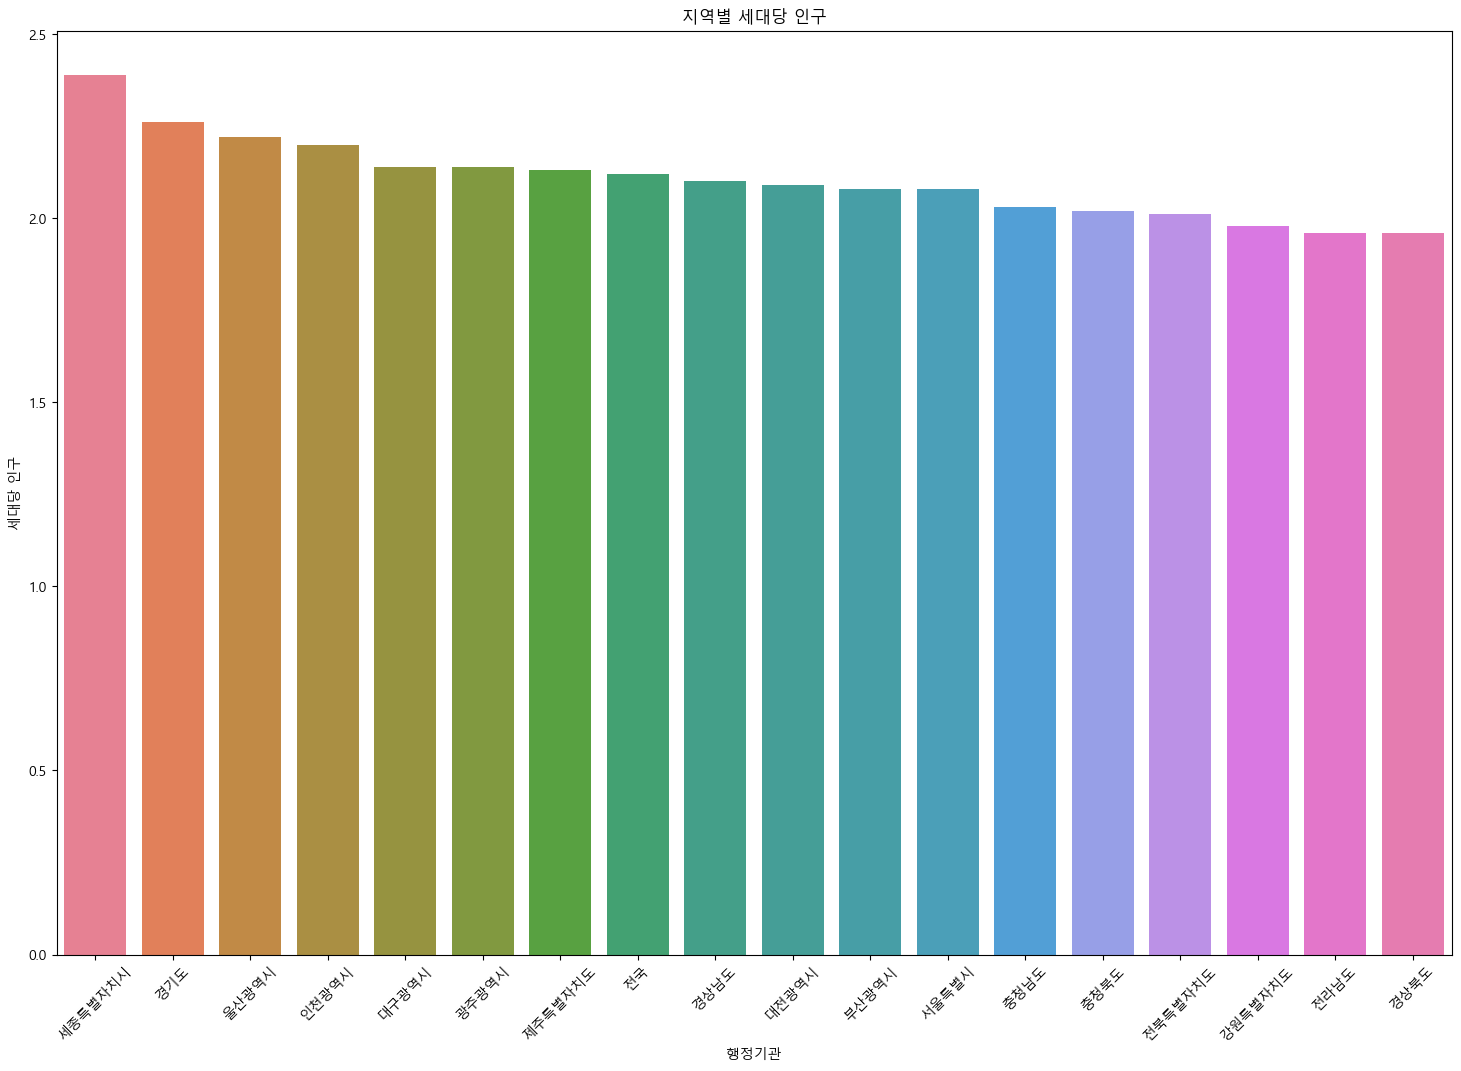

In [68]:
#2-1. 지역별 세대당 인구 Plot
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 12)

sns.barplot(
    data=home.sort_values(by='세대당 인구', ascending=False),
    x='행정기관',
    y='세대당 인구',
    hue='행정기관'  
)

axes.tick_params(axis='x', rotation=45)
plt.title("지역별 세대당 인구")
plt.show()

In [ ]:
#남녀 비율 분석
gender = data[['행정기관', '남여 비율']].copy()
gender_sort = gender.sort_values(by='남여 비율', ascending=False).reset_index(drop=True)
gender_sort

,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


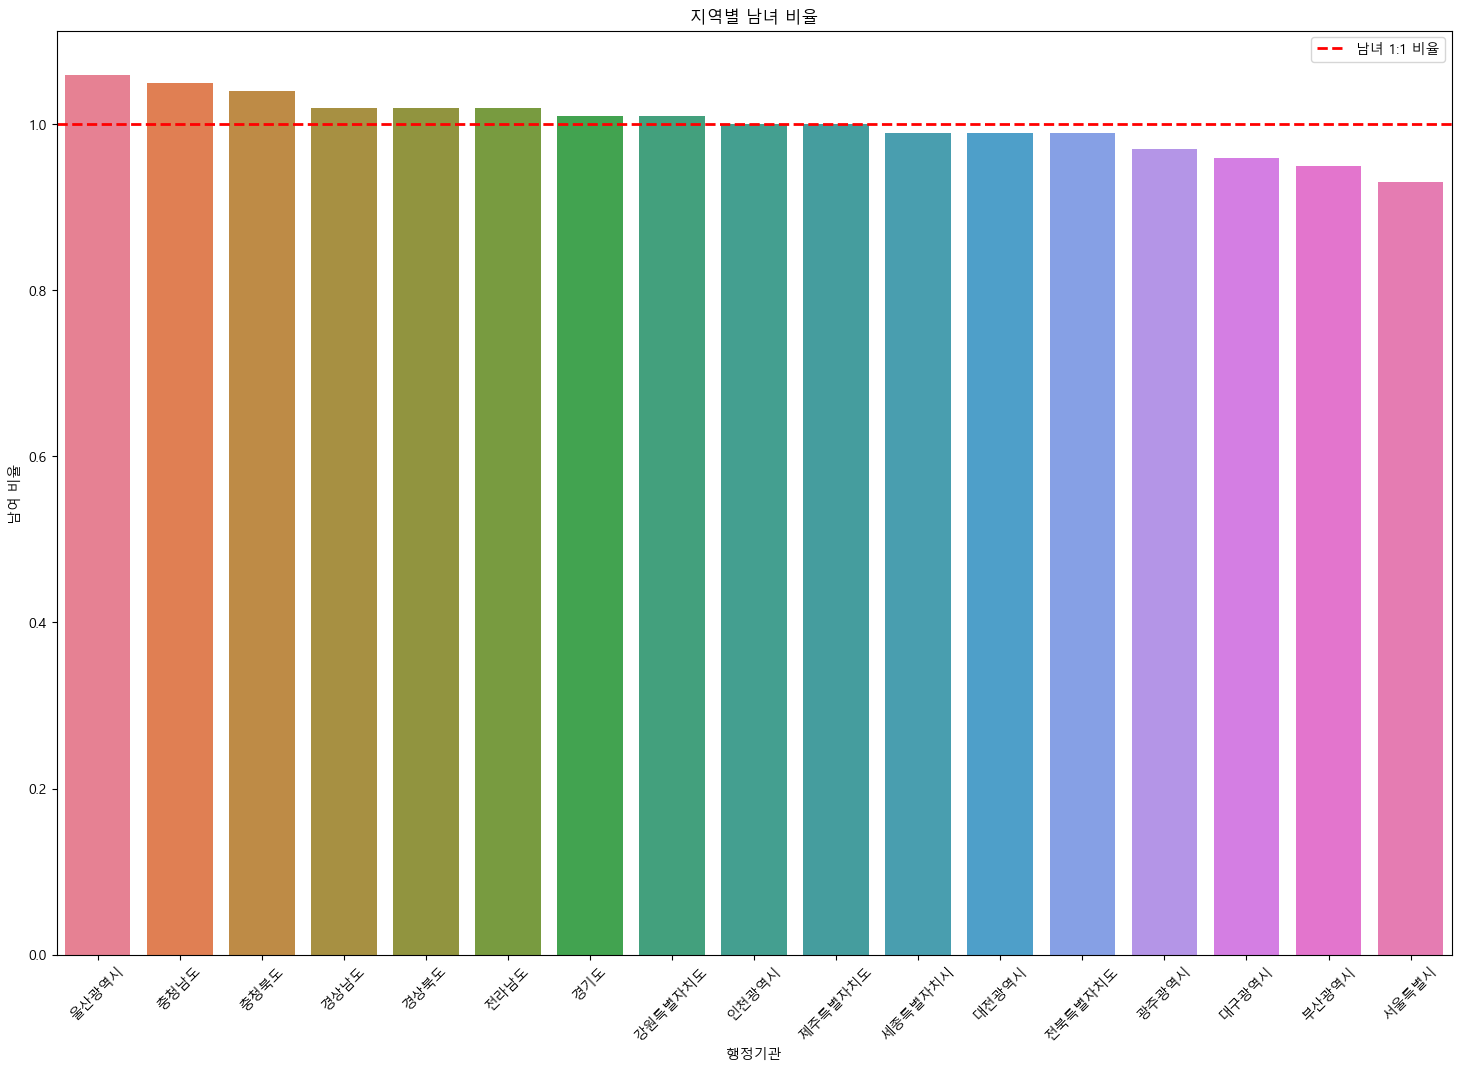

In [76]:
#3-1. 남녀 비율 분석 Plot
# 기준이 되는 빨간선은 pyplot의 axhline() 함수를 사용해 보세요. ( 선택 )

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 12)

# 
sns.barplot(
    data=gender_sort.sort_values(by='남여 비율', ascending=False),
    x='행정기관',
    y='남여 비율',
    hue='행정기관',
)

axes.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='남녀 1:1 비율')
axes.tick_params(axis='x', rotation=45)
axes.legend(loc='upper right')
plt.title("지역별 남녀 비율")
plt.show()


In [77]:
# 4. 남자초과 / 여자초과 분석


gender['남초여초'] = gender['남여 비율'].apply(
    lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일')
)

gender_rate = gender[['행정기관', '남여 비율', '남초여초']]
gender_rate



,행정기관,남여 비율,남초여초
1,서울특별시,0.93,여초
2,부산광역시,0.95,여초
3,대구광역시,0.96,여초
4,인천광역시,1.00,동일
5,광주광역시,0.97,여초
6,대전광역시,0.99,여초
7,울산광역시,1.06,남초
8,세종특별자치시,0.99,여초
9,경기도,1.01,남초
10,강원특별자치도,1.01,남초


In [82]:
# 1. 전국 평균 세대당 인구수 계산
avg_home = data['세대당 인구'].mean()

# 2. 평균보다 높은 지역만 추출
avg_df = data[data['세대당 인구'] > avg_home].copy()

# 3. 필요한 열만 선택
result = avg_df[['행정기관', '세대당 인구']]

# 4. 내림차순 정렬
result = result.sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)

# 5. 출력
print("5. 세대당 인구 평균보다 높은 지역")
print(f"전국 평균 세대당 인구수: {avg_home:.2f}")
display(result)

5. 세대당 인구 평균보다 높은 지역
전국 평균 세대당 인구수: 2.11


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


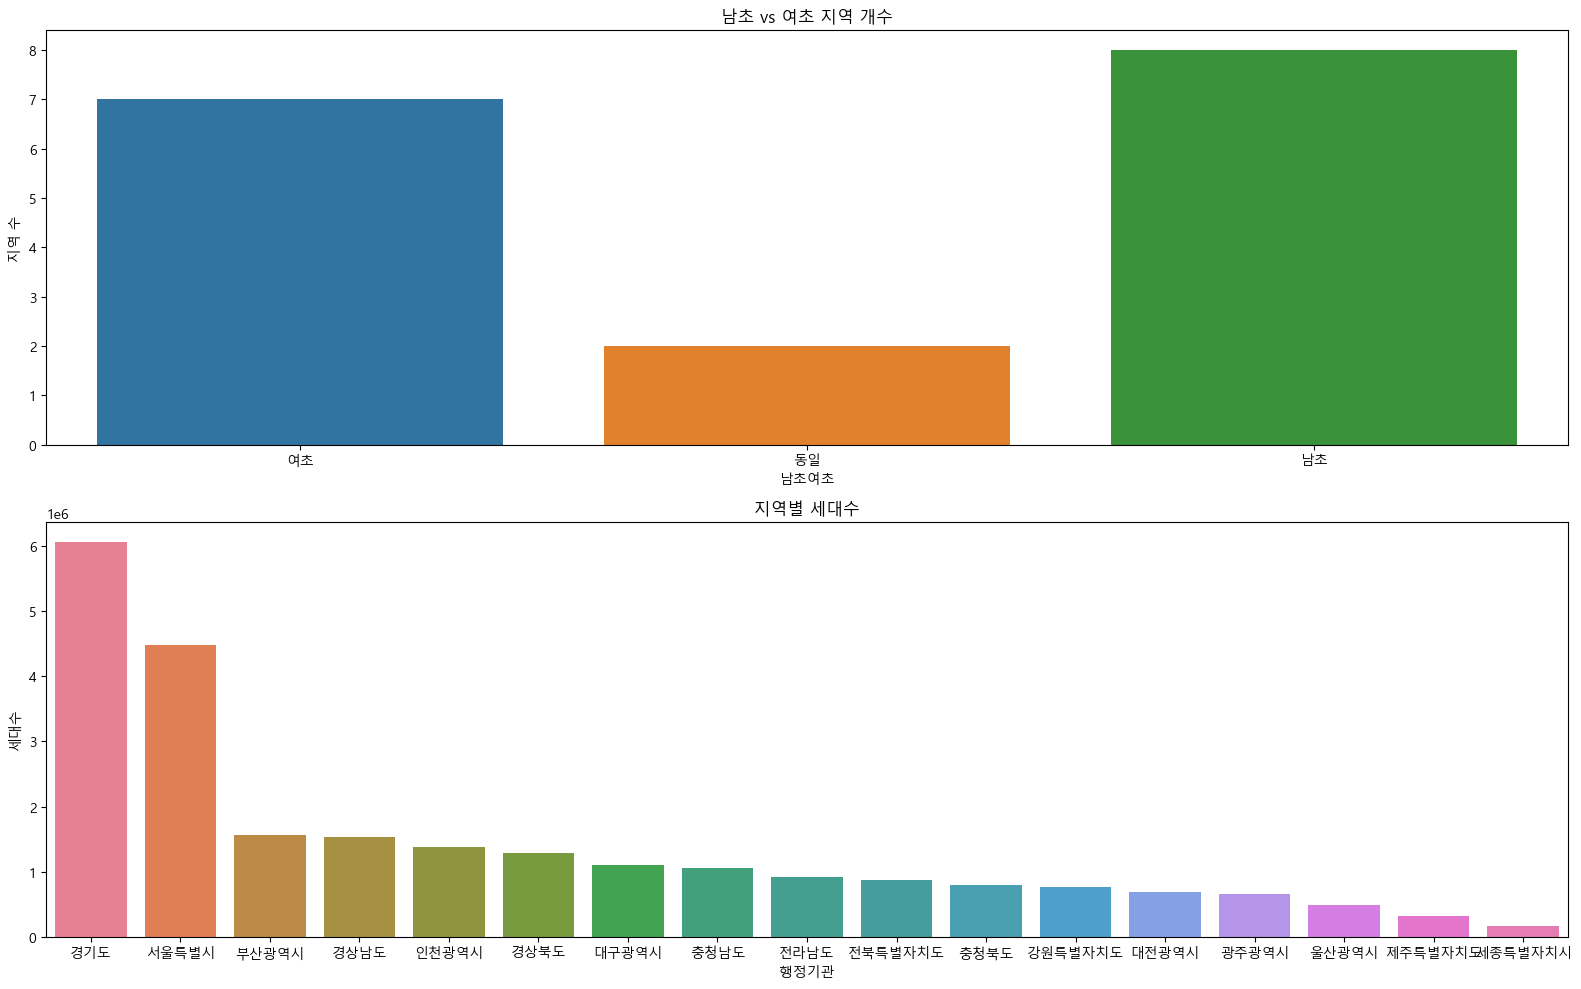

In [88]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

# 첫 번째 plot: 남초여초 개수 (countplot)
sns.countplot(data=gender, x='남초여초', ax=axes[0], hue='남초여초')
axes[0].set_title('남초 vs 여초 지역 개수')
axes[0].set_xlabel('남초여초')
axes[0].set_ylabel('지역 수')

# 두 번째 plot: 지역별 세대수 (barplot)
sorted_df = data.sort_values(by='세대수', ascending=False)
sns.barplot(data=sorted_df, x='행정기관', y='세대수', ax=axes[1], hue='행정기관')
axes[1].set_title('지역별 세대수')
axes[1].set_xlabel('행정기관')
axes[1].set_ylabel('세대수')

plt.tight_layout()
plt.show()

# 6. 남자 인구 vs 여자 인구 비교 Plot ( 선택 )
- 1번은 np.arange를 사용해서 하는건데 gpt의 도움을 받아서 작성했습니다
- 2번은 국회의원현황에서 histplot을 참고해서 작성하였습니다


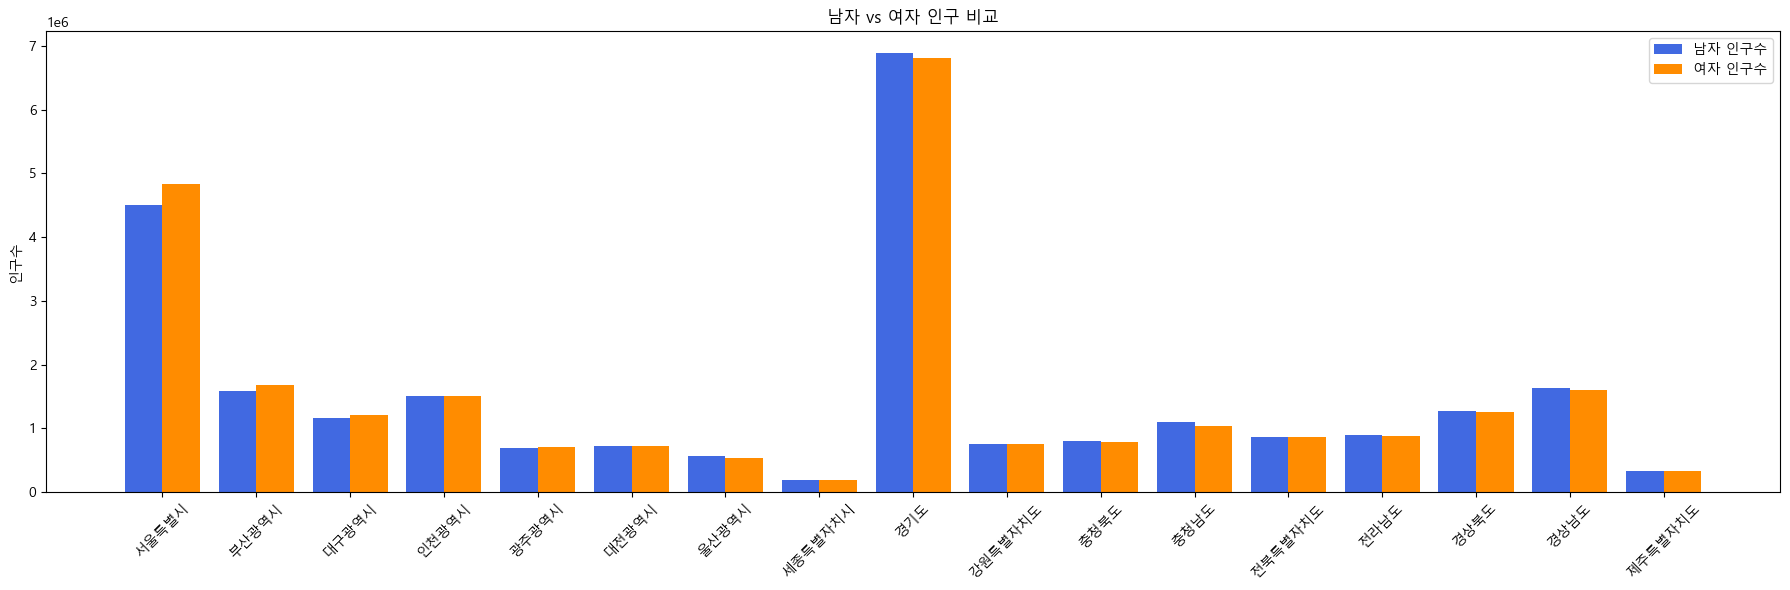

In [93]:
import numpy as np

human = data[['행정기관', '남자 인구수','여자 인구수']]

fig, ax = plt.subplots(figsize=(18, 6))

# X축 인덱스 설정
x = np.arange(len(human))  # 행정기관 개수만큼 위치 인덱스
bar_width = 0.4  # 막대 너비

# 남자 인구 막대
ax.bar(x - bar_width/2, human['남자 인구수'], width=bar_width, label='남자 인구수', color='royalblue')

# 여자 인구 막대
ax.bar(x + bar_width/2, human['여자 인구수'], width=bar_width, label='여자 인구수', color='darkorange')

# x축 라벨 설정
ax.set_xticks(x)
ax.set_xticklabels(human['행정기관'], rotation=45)

# 제목 및 범례
ax.set_title('남자 vs 여자 인구 비교')
ax.set_ylabel('인구수')
ax.legend()

plt.tight_layout()
plt.show()

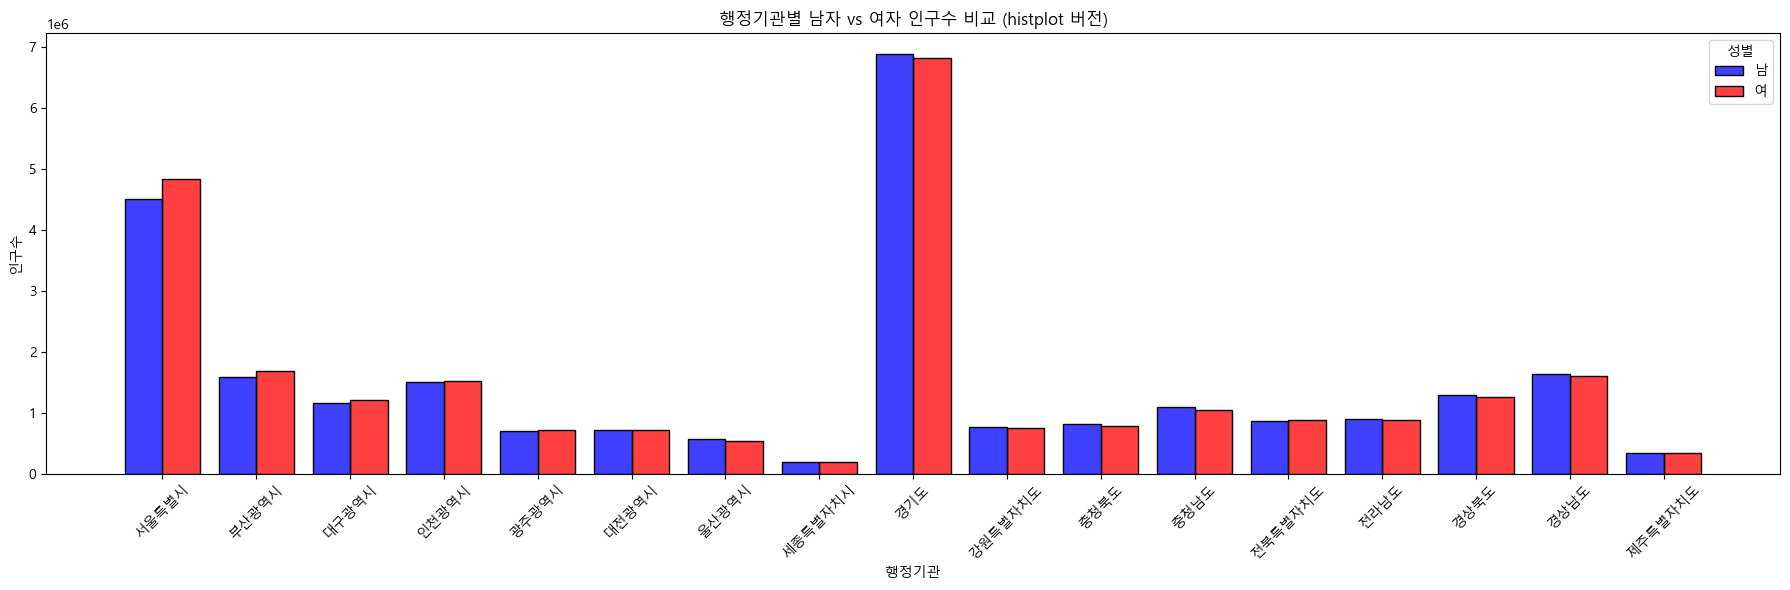

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 남/여 인구수를 긴 형식으로 변환
human_melted = pd.melt(
    data,
    id_vars='행정기관',
    value_vars=['남자 인구수', '여자 인구수'],
    var_name='성별',
    value_name='인구수'
)

# '남자 인구수' → '남' 등으로 성별 값 간단히 정리
human_melted['성별'] = human_melted['성별'].replace({'남자 인구수': '남', '여자 인구수': '여'})


fig, ax = plt.subplots(figsize=(18, 6))

sns.histplot(
    data=human_melted,
    x='행정기관',
    weights='인구수',       # 막대 높이를 인구수로 설정
    hue='성별',
    multiple='dodge',       # 나란히 정렬
    shrink=0.8,
    palette={'남': 'blue', '여': 'red'},
    ax=ax
)

ax.set_title('행정기관별 남자 vs 여자 인구수 비교 (histplot 버전)')
ax.set_ylabel('인구수')
ax.set_xlabel('행정기관')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
